In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
ev_sales_df = pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')

In [46]:
ev_sales_df.shape

(96845, 10)

In [49]:
ev_sales_df.columns.nunique()


10

In [ ]:
# Convert 'Date' column to datetime and 'Year' to integer
ev_sales_df['Date'] = pd.to_datetime(ev_sales_df['Date'], errors='coerce')
ev_sales_df['Year'] = ev_sales_df['Year'].astype(int)

In [ ]:
ev_sales_df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [ ]:
# Extract Month and Day from 'Date'
ev_sales_df['Month'] = ev_sales_df['Date'].dt.month
ev_sales_df['Day'] = ev_sales_df['Date'].dt.day

In [ ]:
ev_sales_df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1


In [50]:
ev_sales_df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0,12,1
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,12,1
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,12,1
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,12,1
96844,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0,12,1


In [51]:
ev_sales_df.Year.value_counts()

,count
Year,
2019,10315
2023,10279
2018,10225
2022,10021
2017,9799
2016,9348
2021,9249
2015,9052
2014,9022


In [54]:
ev_sales_df.State.value_counts()

,count
State,
Maharashtra,4912
Karnataka,4830
Uttar Pradesh,4557
Rajasthan,4552
Gujarat,4517
West Bengal,4196
Tamil Nadu,4063
Odisha,4027
Haryana,3842


In [55]:
ev_sales_df.Vehicle_Category.value_counts()

,count
Vehicle_Category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


In [56]:
ev_sales_df.Vehicle_Type.value_counts()

,count
Vehicle_Type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


In [57]:
ev_sales_df.drop(columns=['Year']).describe()

,Date,EV_Sales_Quantity,Month,Day
count,96845,96845.000000,96845.000000,96845.0
mean,2019-01-28 11:00:33.641385728,37.108896,6.449244,1.0
min,2014-01-01 00:00:00,0.000000,1.000000,1.0
25%,2016-08-01 00:00:00,0.000000,3.000000,1.0
50%,2019-02-01 00:00:00,0.000000,6.000000,1.0
75%,2021-09-01 00:00:00,0.000000,9.000000,1.0
max,2024-01-01 00:00:00,20584.000000,12.000000,1.0
std,NaN,431.566675,3.489243,0.0


In [ ]:
# Check for duplicates and missing values
duplicates = ev_sales_df.duplicated().sum()
missing_values = ev_sales_df.isnull().sum()
print(f"Duplicates: {duplicates}")
print("Missing values:\n", missing_values)

Duplicates: 0
Missing values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
Month                0
Day                  0
dtype: int64


In [58]:
ev_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
 8   Month              96845 non-null  int32         
 9   Day                96845 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 6.6+ MB


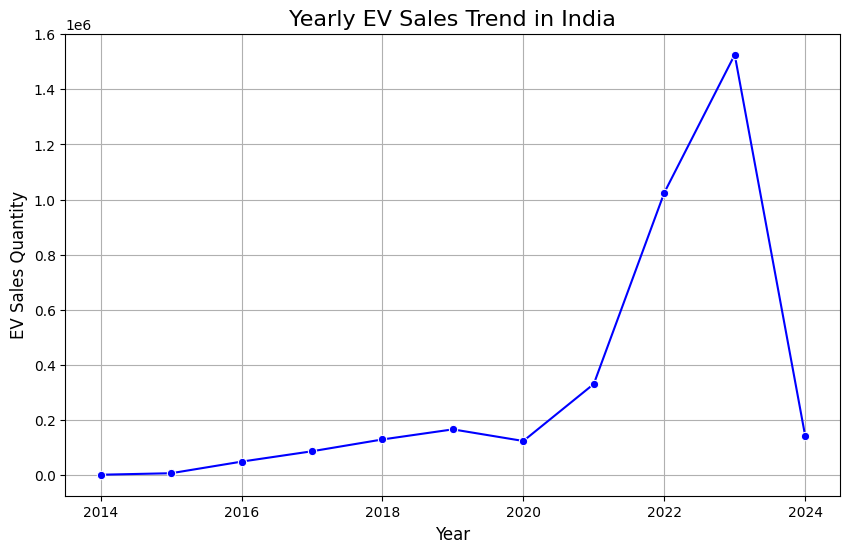

In [ ]:
# 1. Yearly EV Sales Trend
yearly_sales = ev_sales_df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='EV_Sales_Quantity', marker='o', color='b')
plt.title('Yearly EV Sales Trend in India', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.grid(True)
plt.show()

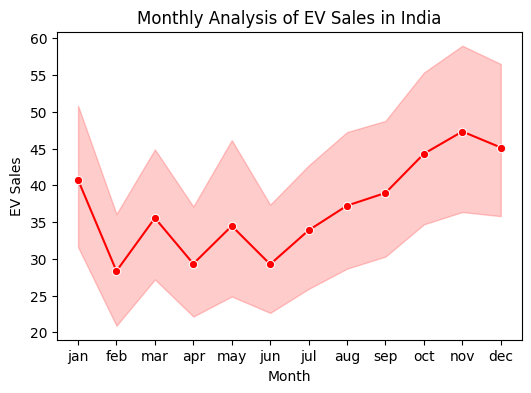

In [61]:
plt.figure(figsize=(6,4))

plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=ev_sales_df,marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

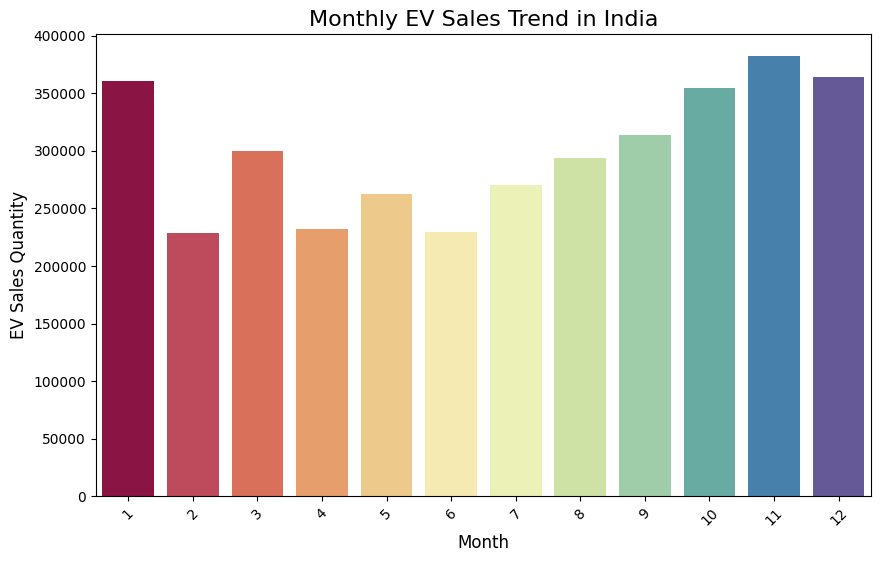

In [59]:
# 2. Monthly EV Sales Trend
monthly_sales = ev_sales_df.groupby('Month')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='EV_Sales_Quantity', palette='Spectral', hue='Month', legend=False)
plt.xticks(rotation=45)
plt.title('Monthly EV Sales Trend in India', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
#plt.grid(True)
plt.show()


Text(0, 0.5, 'EV Sales')

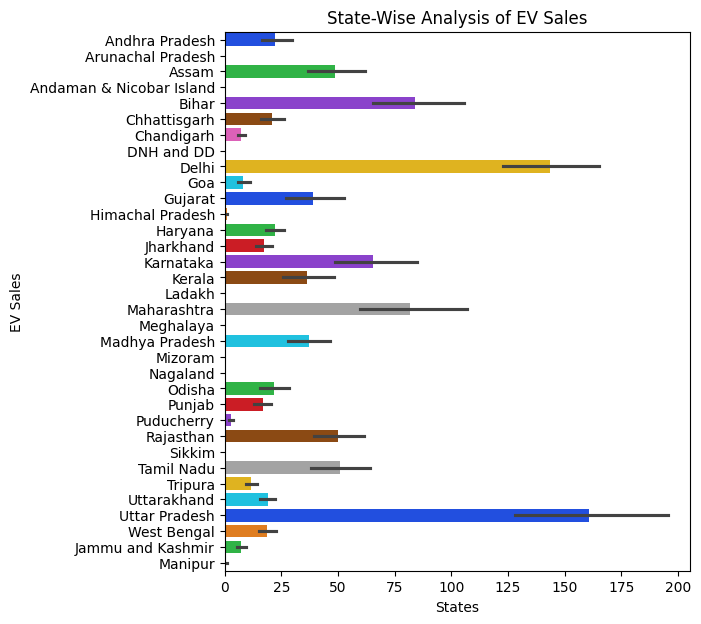

In [63]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=ev_sales_df, hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')

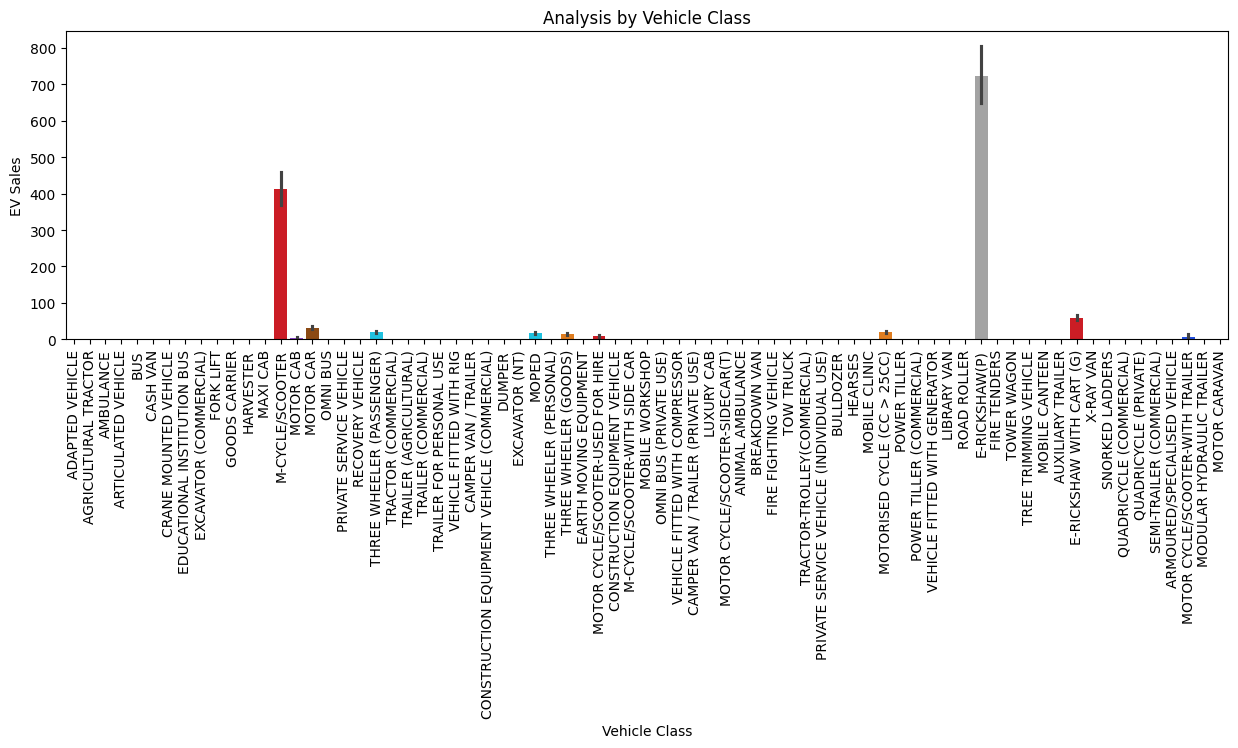

In [65]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=ev_sales_df,hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

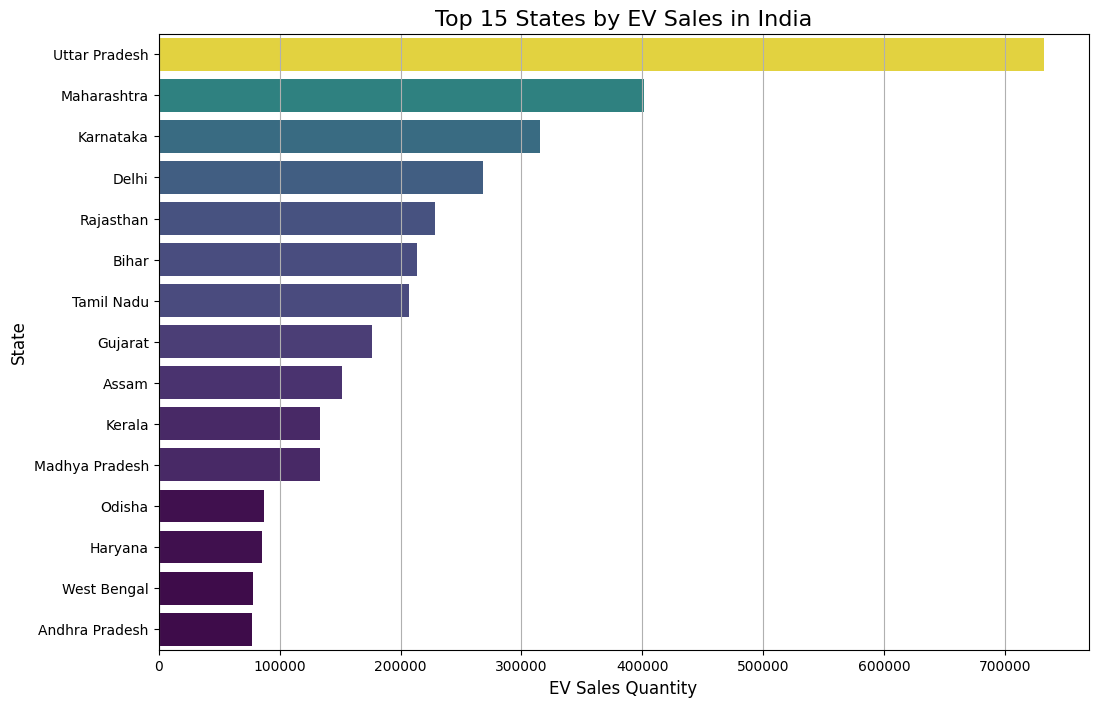

In [ ]:
# State-wise EV Sales
top_states = ev_sales_df.groupby('State')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False).head(15)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_states, y='State', x='EV_Sales_Quantity', palette='viridis', hue= 'EV_Sales_Quantity', legend=False)
plt.title('Top 15 States by EV Sales in India', fontsize=16)
plt.xlabel('EV Sales Quantity', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x')
plt.show()

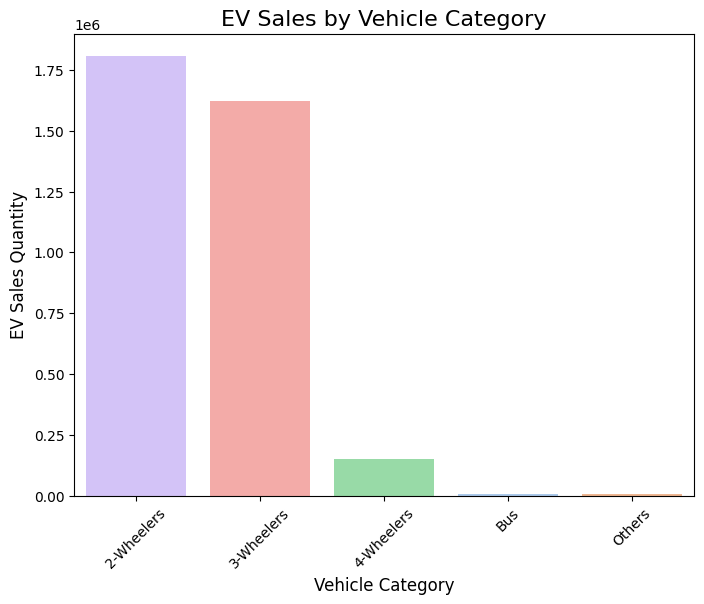

In [ ]:
# 4. Vehicle Category Distribution
category_sales = ev_sales_df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x='Vehicle_Category', y='EV_Sales_Quantity', palette='pastel', hue='EV_Sales_Quantity', legend=False)
plt.title('EV Sales by Vehicle Category', fontsize=16)
plt.xlabel('Vehicle Category', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

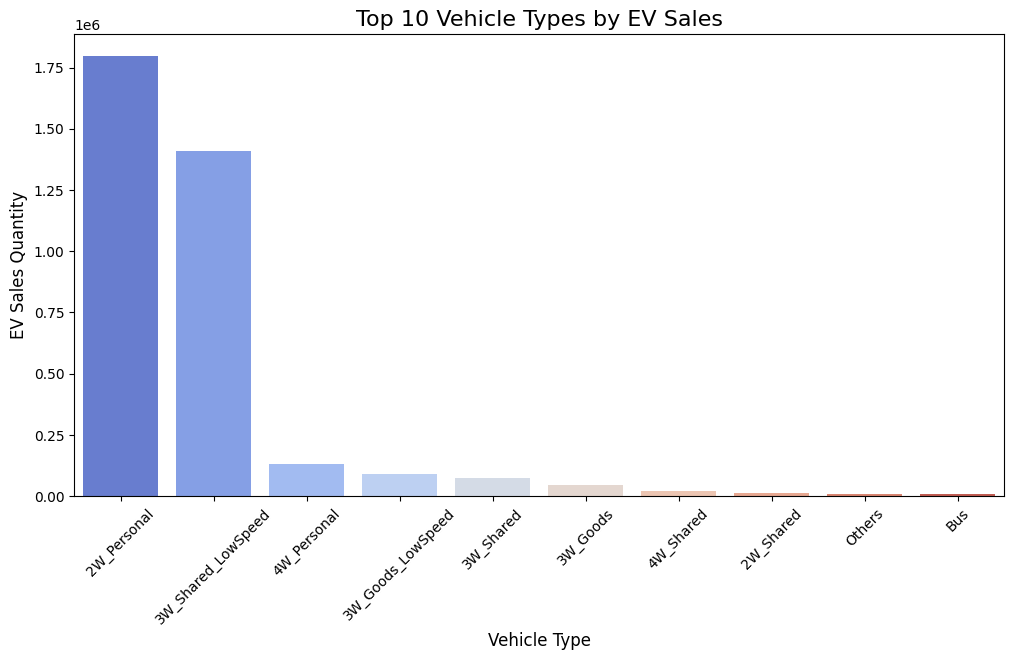

In [ ]:
# 5. Vehicle Type Distribution
type_sales = ev_sales_df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=type_sales, x='Vehicle_Type', y='EV_Sales_Quantity', palette='coolwarm', hue= 'Vehicle_Type', legend=False)
plt.title('Top 10 Vehicle Types by EV Sales', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Feature Engineering and Encoding
df_encoded = pd.get_dummies(ev_sales_df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)
X = df_encoded.drop(['EV_Sales_Quantity', 'Date', 'Month_Name'], axis=1)
y = df_encoded['EV_Sales_Quantity']

In [ ]:
# Train-Test Split and Modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 17051.59402778667
R-Squared Score: 0.934519365497295


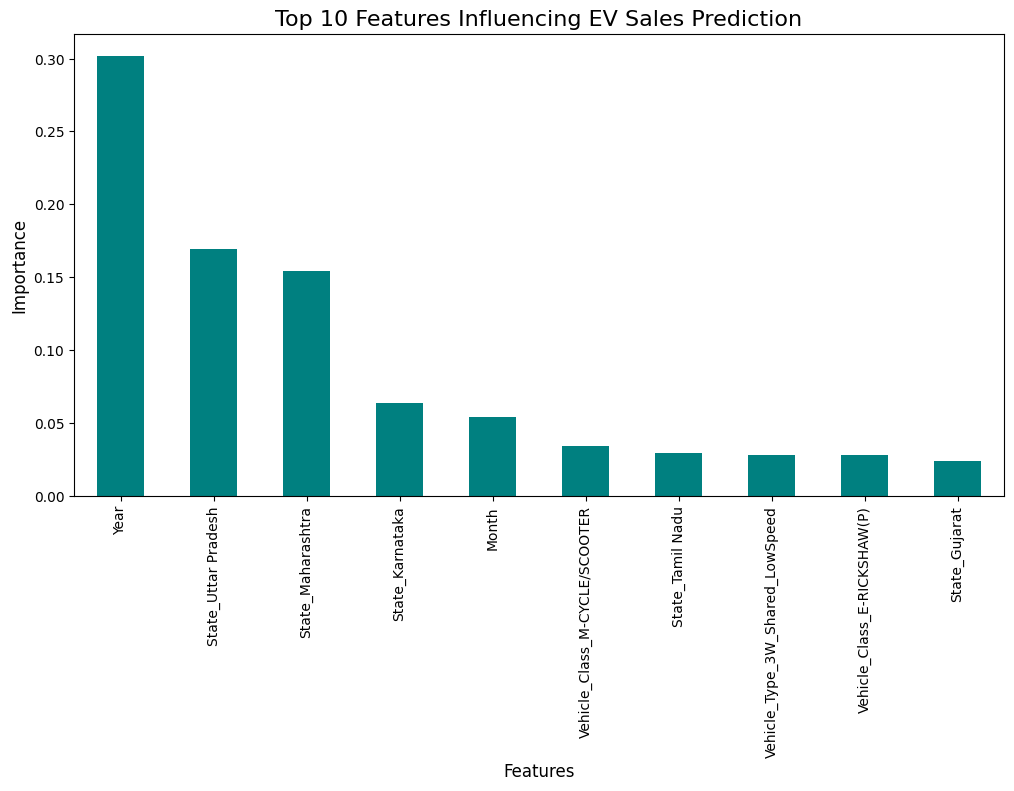

In [ ]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feature_importance.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Features Influencing EV Sales Prediction', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()